### Import packages

In [2]:
import os
import glob
import numpy  as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import ipywidgets as widgets
import soundfile as sf
import yaml

### Choose file to inspect¶

In [3]:
directory='/Users/saroltagabulya/git/Orca/call_segments/'

folders=os.listdir(directory)
file=[]

dropdown=widgets.Dropdown(
    options=folders,
    description='CSV files:',
    disabled=False,
)

def dropdown_eventhandler(change):
    file.clear()
    file.append(change.new)
    print(change.new)
dropdown.observe(dropdown_eventhandler, names='value')
display(dropdown)

Dropdown(description='CSV files:', options=('.DS_Store', '.ipynb_checkpoints', '2017-02-04--10-14-06--00-16-35…

2017-02-04--10-14-06--00-16-35--BC


### Read wav file names

In [4]:
folder_name = directory + file[0]
os.chdir(folder_name)
wavs=glob.glob('*.wav')
wavs

['2017-02-04--10-14-06--00-16-35--BC_92600000_93000001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_84200000_84500001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_97100000_97500001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_87000000_87300001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_85600000_85900001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_84900000_85200001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_87900000_88200001.wav',
 '2017-02-04--10-14-06--00-16-35--BC_95200000_95600001.wav']

### Extract samplerate from metadata file

In [5]:
w=wavs[0]

yml_file=w[:-3] + 'yml'


with open(yml_file) as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    metadata = yaml.load(file, Loader=yaml.FullLoader)
    

sample_rate=metadata['sample_rate']
ref=metadata['reference_value']

### Define functions to open wav as spect

In [19]:
def open_wav(file, sample_rate):
    y, sr = librosa.load(file, sr=sample_rate)
    return y, sr

def wav_to_spect(y, sr, file): #, call_wav
    
    if len(y)>0:
        # Convert to spectogram 
        
        Y = librosa.stft(y, n_fft=1024, hop_length=32, win_length=400) 
        Ydb = librosa.amplitude_to_db(abs(Y), ref=1)
        
        librosa.display.specshow(Ydb, cmap='seismic', sr=sr, x_axis='time', y_axis='fft', hop_length=32)

        plt.xlabel('time(seconds)')
        plt.ylabel('dB relative to {} {}**2'.format(ref, raw_unit))
        plt.title('{} \n {} to {} seconds'.format(file.split('_')[0],int(file.split('_')[1])/sample_rate,  int(file.split('_')[2].split('.')[0])/sample_rate))
        plt.colorbar()
        
        # Save spectograms
        plt.savefig(file[:-3] + 'png')
        #plt.close()
    
        return Ydb
    
    else: 
        return 'Error with wav'

### Iterate through wav files and save out spects

0
1
2
3
4
5
6
7


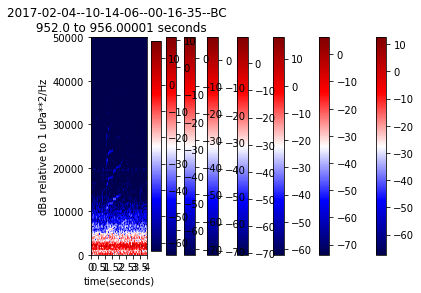

In [18]:
for w in list(range(len(wavs))): 
    print(w)
    wav=wavs[w]
    y, sr =open_wav(wav, sample_rate)
    wav_to_spect(y, sample_rate, wav)

### Function for converting wavs into spectrograms

In [30]:
time_stamps['spect']=time_stamps.apply(lambda x: wav_to_spect(*open_wav(x, sample_rate)), axis=1) 

### Save csv under new name

In [31]:
time_stamps.to_csv('call_data_' + recording_name + '_2'+ '.csv')